In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [6]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

/home/ni2633244/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


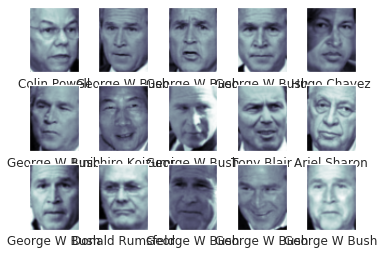

In [7]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [8]:
list_face = []
for fac in faces.images:
    list_face.append(np.ravel(fac))
arr_face = np.array(list_face)
print(arr_face)

[[ 138.          135.66667175  127.66666412 ...,    1.66666663
     1.66666663    0.33333334]
 [  71.33333588   56.           67.66666412 ...,  247.66667175  243.
   238.33332825]
 [  84.33333588   97.33333588   72.33333588 ...,  114.          194.33332825
   241.        ]
 ..., 
 [  29.33333397   29.           29.33333397 ...,  145.          147.
   141.66667175]
 [  49.33333206   55.66666794   76.66666412 ...,  186.33332825
   176.33332825  161.        ]
 [  31.           26.33333397   28.         ...,   34.           42.
    69.66666412]]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaler.fit(arr_face)
arr_face

array([[ 138.        ,  135.66667175,  127.66666412, ...,    1.66666663,
           1.66666663,    0.33333334],
       [  71.33333588,   56.        ,   67.66666412, ...,  247.66667175,
         243.        ,  238.33332825],
       [  84.33333588,   97.33333588,   72.33333588, ...,  114.        ,
         194.33332825,  241.        ],
       ..., 
       [  29.33333397,   29.        ,   29.33333397, ...,  145.        ,
         147.        ,  141.66667175],
       [  49.33333206,   55.66666794,   76.66666412, ...,  186.33332825,
         176.33332825,  161.        ],
       [  31.        ,   26.33333397,   28.        , ...,   34.        ,
          42.        ,   69.66666412]], dtype=float32)

In [11]:
scaled_face = scaler.transform(arr_face)
scaled_face

array([[ 1.00502408,  0.91436327,  0.62928349, ..., -1.49100494,
        -1.40657806, -1.33381128],
       [-0.4193137 , -0.82698429, -0.71499103, ...,  1.65676105,
         1.67579019,  1.67508924],
       [-0.14156783,  0.07647637, -0.6104362 , ..., -0.05361043,
         1.05420756,  1.70880246],
       ..., 
       [-1.31664658, -1.41714799, -1.57383299, ...,  0.34305927,
         0.44965473,  0.45298687],
       [-0.88934529, -0.83427024, -0.51334983, ...,  0.87195218,
         0.8243072 ,  0.69740731],
       [-1.28103817, -1.47543573, -1.60370588, ..., -1.0772742 ,
        -0.89143085, -0.45726883]], dtype=float32)

In [ ]:
#strat = 

In [18]:
from sklearn.model_selection import train_test_split
X = scaled_face
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([3, 3, 3, 3, 0, 6, 2, 1, 3, 7, 1, 3, 3, 3, 3, 5, 3, 3, 3, 1, 2, 1, 4,
       3, 1, 3, 3, 3, 3, 3, 0, 4, 2, 1, 6, 2, 7, 4, 3, 7, 1, 0, 2, 3, 3, 7,
       3, 0, 3, 7, 3, 7, 1, 3, 1, 3, 7, 1, 2, 2, 3, 4, 3, 3, 4, 7, 4, 3, 4,
       6, 4, 1, 1, 3, 3, 3, 3, 1, 1, 7, 1, 2, 3, 4, 1, 4, 3, 3, 4, 2, 3, 1,
       2, 3, 2, 7, 0, 3, 7, 0, 7, 3, 6, 3, 0, 3, 2, 1, 6, 3, 5, 0, 2, 3, 1,
       1, 3, 3, 0, 7, 3, 1, 1, 3, 3, 7, 0, 3, 3, 3, 6, 3, 3, 4, 1, 0, 4, 3,
       4, 1, 3, 6, 1, 1, 0, 3, 7, 3, 3, 6, 1, 7, 3, 3, 1, 4, 7, 1, 3, 4, 2,
       2, 3, 4, 4, 1, 1, 7, 1, 4, 5, 3, 7, 1, 1, 1, 7, 3, 2, 3, 4, 3, 3, 3,
       0, 1, 2, 1, 3, 3, 3, 3, 2, 7, 5, 0, 4, 4, 7, 4, 1, 3, 3, 1, 3, 5, 1,
       3, 1, 3, 3, 7, 4, 7, 3, 4, 2, 3, 4, 5, 1, 3, 3, 3, 2, 6, 3, 1, 3, 3,
       3, 3, 3, 1, 1, 1, 4, 3, 3, 5, 1, 3, 4, 7, 3, 6, 1, 5, 0, 1, 3, 2, 3,
       4, 0, 3, 3, 5, 1, 1, 3, 3, 3, 3, 3, 3, 7, 3, 3, 7, 0, 1, 0, 3, 6, 3,
       7, 3, 7, 3, 2, 3, 1, 7, 3, 3, 1, 1, 3, 4, 1, 4, 3, 1, 3, 1, 1, 7, 0,
       3, 3,

In [24]:
y_test

array([3, 3, 3, 7, 0, 6, 2, 0, 3, 7, 1, 3, 3, 3, 3, 5, 3, 3, 3, 1, 3, 2, 5,
       3, 1, 3, 3, 3, 3, 3, 0, 4, 2, 3, 6, 2, 3, 4, 3, 7, 1, 0, 2, 3, 3, 7,
       3, 0, 3, 7, 3, 7, 1, 3, 3, 3, 7, 5, 2, 2, 3, 4, 3, 3, 4, 7, 6, 3, 4,
       6, 5, 1, 1, 3, 3, 7, 3, 1, 1, 7, 1, 2, 3, 4, 1, 5, 3, 3, 4, 2, 3, 1,
       4, 3, 2, 6, 3, 7, 7, 2, 7, 3, 6, 3, 0, 3, 2, 1, 6, 3, 5, 0, 2, 5, 1,
       1, 3, 3, 0, 7, 3, 1, 1, 3, 3, 7, 7, 3, 3, 3, 5, 3, 6, 4, 1, 6, 4, 3,
       0, 3, 3, 6, 1, 1, 0, 3, 7, 3, 3, 6, 2, 7, 3, 3, 1, 4, 7, 1, 3, 4, 2,
       3, 3, 4, 4, 1, 1, 7, 1, 5, 2, 3, 7, 1, 1, 1, 7, 3, 2, 7, 2, 3, 3, 3,
       0, 1, 2, 3, 3, 3, 3, 3, 2, 1, 5, 0, 4, 4, 7, 4, 3, 3, 3, 4, 3, 3, 4,
       3, 1, 3, 3, 7, 4, 7, 3, 6, 2, 4, 4, 5, 4, 2, 3, 3, 2, 6, 3, 1, 3, 3,
       3, 3, 3, 1, 1, 7, 4, 3, 3, 5, 1, 3, 2, 7, 3, 6, 1, 5, 0, 1, 3, 3, 3,
       4, 0, 3, 3, 5, 1, 1, 3, 3, 3, 3, 3, 3, 7, 3, 3, 7, 0, 1, 0, 3, 6, 5,
       7, 3, 7, 3, 2, 3, 1, 7, 3, 3, 1, 1, 3, 4, 0, 4, 3, 1, 3, 1, 1, 7, 0,
       3, 3,

In [25]:
from sklearn.metrics import confusion_matrix, r2_score

In [26]:
confusion_matrix(y_pred, y_test)

array([[ 21,   1,   1,   1,   1,   0,   1,   1],
       [  3,  68,   2,   7,   3,   1,   0,   1],
       [  1,   0,  22,   3,   1,   0,   0,   0],
       [  1,   2,   1, 145,   1,   2,   1,   5],
       [  1,   0,   2,   0,  28,   4,   2,   0],
       [  0,   1,   1,   1,   0,  10,   0,   0],
       [  0,   0,   0,   0,   0,   1,  13,   0],
       [  0,   3,   1,   1,   0,   0,   1,  38]])